# Multiple Linear Regression

In this exercise, we will use multiple linear regression to predict median house values in Californian districts, given a number of features from these districts.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Loading the dataset

In [2]:
dataset = pd.read_csv('housing.csv')

## Inspect the Data Structure

In [3]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
dataset['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


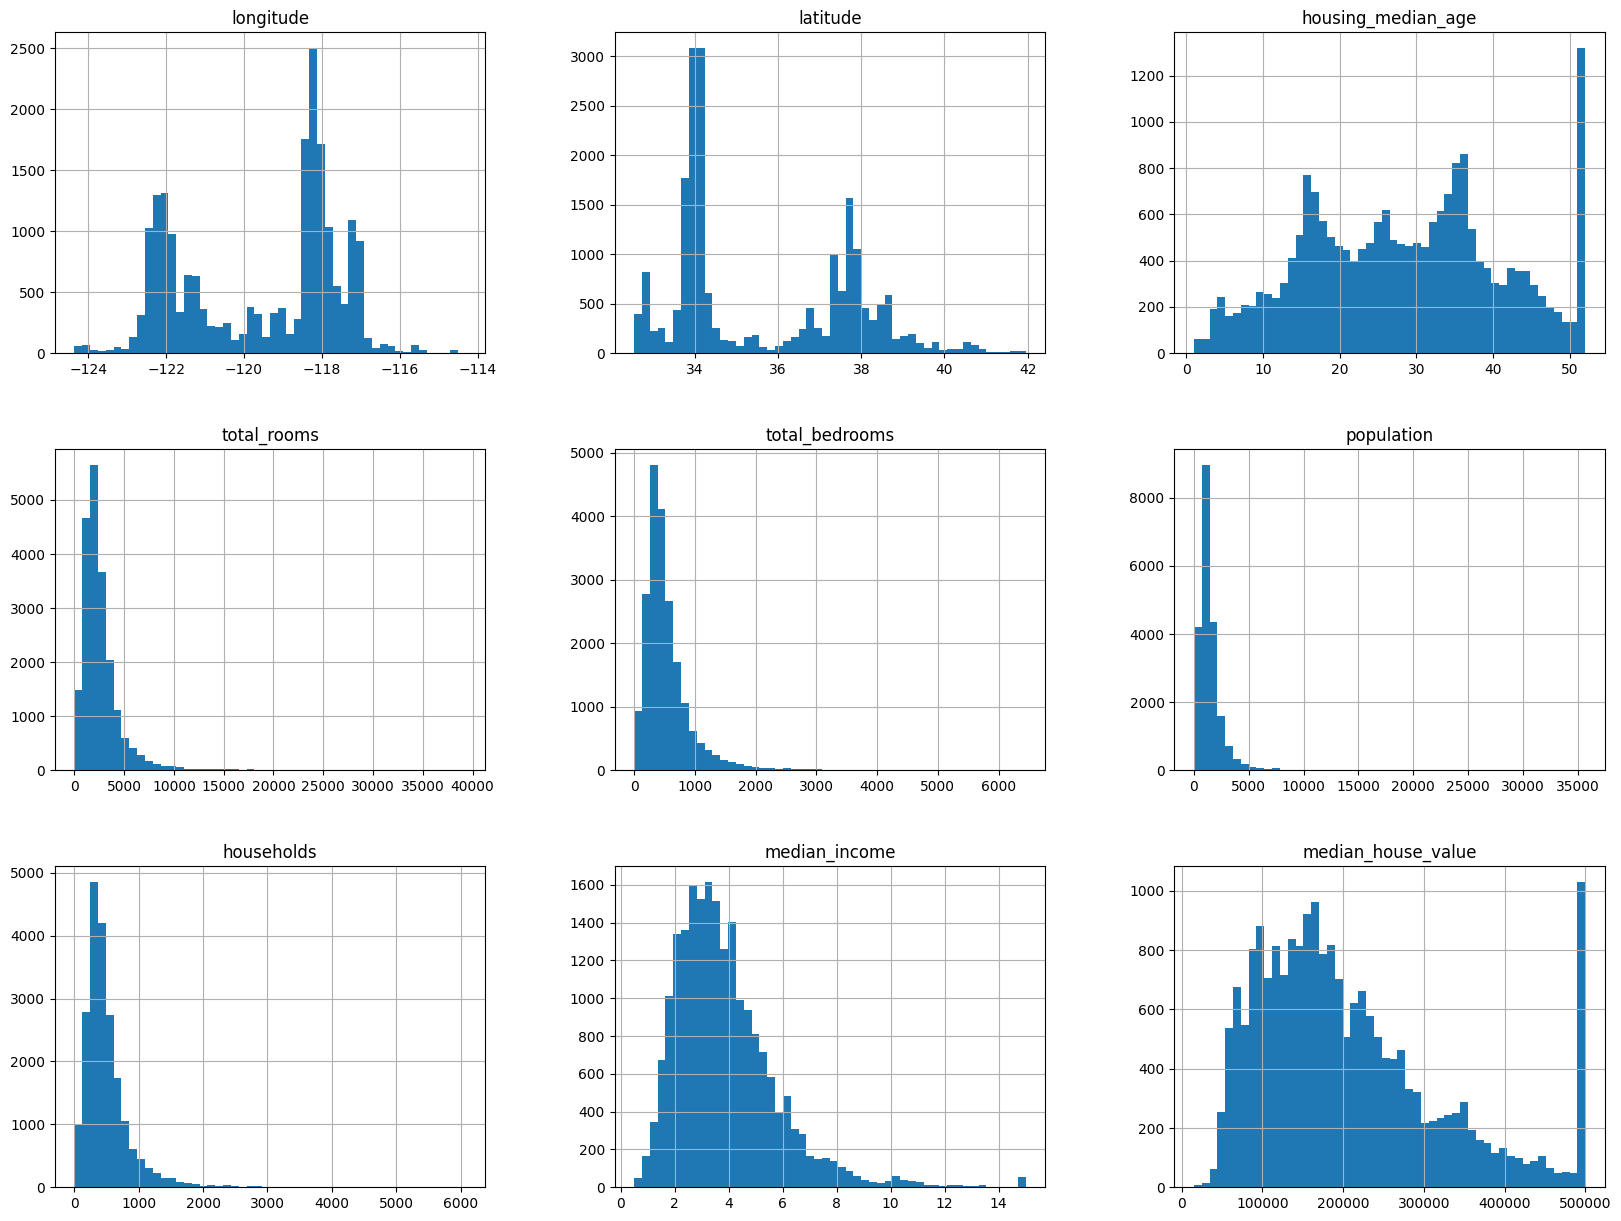

In [7]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

## Data cleaning

In [8]:
incomplete_rows = dataset[dataset.isnull().any(axis=1)].head()

print(incomplete_rows)

incomplete_rows

# In this cases we can do the following

#dataset.dropna(subset=["total_bedrooms"])    # option 1 remove rows with Null or NAN
#dataset.drop("total_bedrooms", axis=1)       # option 2 remove full column

median = dataset["total_bedrooms"].median()  # option 3

dataset["total_bedrooms"].fillna(median, inplace=True)

dataset.info()


     longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290    -122.16     37.77                47.0       1256.0             NaN   
341    -122.17     37.75                38.0        992.0             NaN   
538    -122.28     37.78                29.0       5154.0             NaN   
563    -122.24     37.75                45.0        891.0             NaN   
696    -122.10     37.69                41.0        746.0             NaN   

     population  households  median_income  median_house_value ocean_proximity  
290       570.0       218.0         4.3750            161900.0        NEAR BAY  
341       732.0       259.0         1.6196             85100.0        NEAR BAY  
538      3741.0      1273.0         2.5762            173400.0        NEAR BAY  
563       384.0       146.0         4.9489            247100.0        NEAR BAY  
696       387.0       161.0         3.9063            178400.0        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2

## Handling Text and Categorical Attributes

In [9]:
ocean_prox_cat = dataset[["ocean_proximity"]]
ocean_prox_cat[:10]

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [10]:
ocean_prox_cat["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
ocean_prox_cat_1hot = cat_encoder.fit_transform(ocean_prox_cat)
ocean_prox_cat_1hot

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [12]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Select dependent and independent variables

In [13]:
feature_cols = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']

X = dataset[feature_cols]  # Features
y = dataset['median_house_value']  # Target variable

## Apply one hot encoder to data

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_attribs = ["ocean_proximity"]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), cat_attribs)], remainder='passthrough')

X = np.array(ct.fit_transform(X))


In [15]:
print(X[0])

[   0.        0.        0.        1.        0.     -122.23     37.88
   41.      880.      129.      322.      126.        8.3252]


## Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

---



In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

 ## Inspecting the intercept (constant) and the coefficients (slopes)

In [18]:
intercept = regressor.intercept_
print("Intercept: {}".format(intercept))

coefficient = regressor.coef_
print("coefficient: {}".format(coefficient))

Intercept: -2246802.491751616
coefficient: [-2.48636995e+04 -6.35154550e+04  1.36847185e+05 -2.91821359e+04
 -1.92858944e+04 -2.68441796e+04 -2.54978636e+04  1.07283654e+03
 -4.24781629e+00  6.66719983e+01 -3.87101135e+01  7.88887144e+01
  3.87421370e+04]


## Predicting the Test set results

In [19]:
y_pred = regressor.predict(X_test)
print(y_pred)

[216660.24431599 287580.09894728 179529.14050793 ...  89223.63901076
 255332.57193786 213353.63471519]


## Evaluating the model with R2, MAE, MSE and RMSE

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

print("R2: {}".format(test_r2))
print("MAE: {}".format(test_mae))
print("MAPE: {}".format(test_mape))
print("MSE: {}".format(test_mse))
print("RMSE: {}".format(test_rmse))

R2: 0.6380862497737123
MAE: 49707.427993600264
MAPE: 0.290058824810174
MSE: 4719192088.226935
RMSE: 68696.37609238886


## Visualize predicted VS actual data comparison

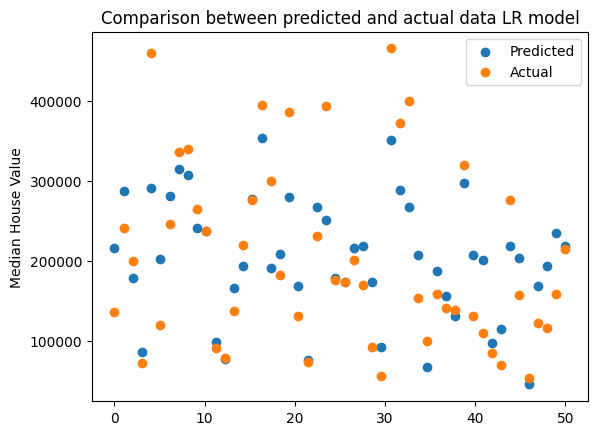

In [22]:
import matplotlib.pyplot as plt
import numpy as np

y_pred_s = y_pred[:50]
y_test_s = y_test[:50]

x = np.linspace(0, len(y_pred_s),len(y_pred_s))

plt.scatter(x, y_pred_s, label='Predicted')
plt.scatter(x, y_test_s, label='Actual')
plt.ylabel("Median House Value")
plt.legend()
plt.title("Comparison between predicted and actual data LR model")
plt.show()

## Training the Random Forest Regression model on the Training set

In [23]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Predicting the Test set results with the Random Forest Regression model

In [24]:
y_pred = regressor.predict(X_test)
print(y_pred)

[144564. 252770. 143392. ... 145848. 231407. 179753.]


## Evaluating the Random Forest Regression model with R2, MAE, MSE and RMSE

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

print("R2: {}".format(test_r2))
print("MAE: {}".format(test_mae))
print("MAPE: {}".format(test_mape))
print("MSE: {}".format(test_mse))
print("RMSE: {}".format(test_rmse))

R2: 0.823797488199858
MAE: 31498.7102495155
MAPE: 0.17814885407545647
MSE: 2297601290.619725
RMSE: 47933.30043528951


## Visualize predicted VS actual data comparison of the Random Forest Regression model

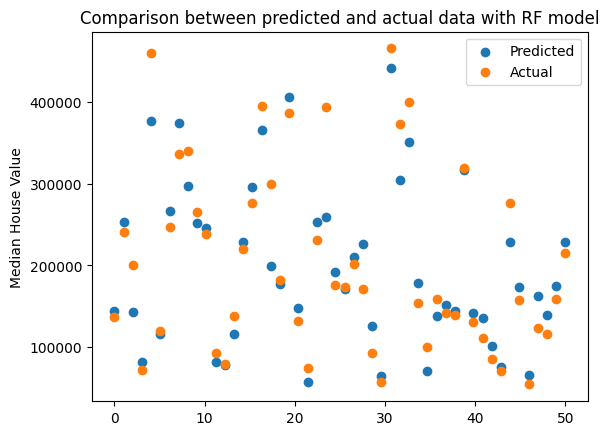

In [26]:
import matplotlib.pyplot as plt
import numpy as np

y_pred_s = y_pred[:50]
y_test_s = y_test[:50]
x = np.linspace(0, len(y_pred_s),len(y_pred_s))

plt.scatter(x, y_pred_s, label='Predicted')
plt.scatter(x, y_test_s, label='Actual')
plt.ylabel("Median House Value")
plt.legend()
plt.title("Comparison between predicted and actual data with RF model")
plt.show()

## Test with new data points

In [27]:
house_data = {'longitude': [-122], 'latitude': [38], 'housing_median_age': [40],'total_rooms': [880],
     'total_bedrooms': [129],'population': [322],'households': [126],'median_income': [8.3],'ocean_proximity': ['NEAR BAY']}

house_df = pd.DataFrame(data=house_data)
print(house_df)

# apply the same one hot encoding transformation as was fitted on the data
house_df_transformed = np.array(ct.transform(house_df))
print(house_df_transformed)


house_pred = regressor.predict(house_df_transformed)
print(house_pred)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122        38                  40          880             129   

   population  households  median_income ocean_proximity  
0         322         126            8.3        NEAR BAY  
[[   0.     0.     0.     1.     0.  -122.    38.    40.   880.   129.
   322.   126.     8.3]]
[420443.09]
